<a href="https://colab.research.google.com/github/Rayfalmayvandra/Praktikum-Struktur-Data/blob/main/2410506009_TugasStrukDat_Dijkstra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Jarak dari P ke U : 6
Jalur: P → R → T → U


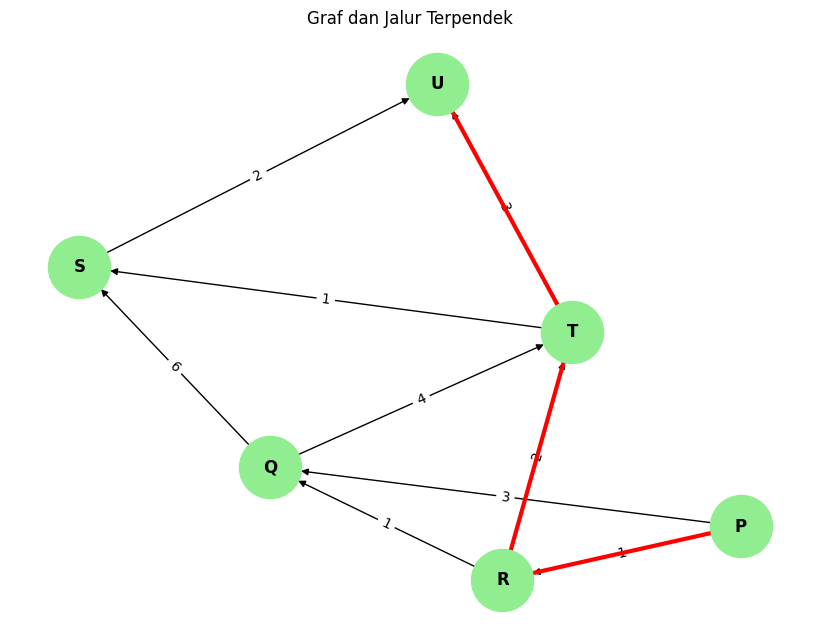

In [1]:
import heapq
import networkx as nx
import matplotlib.pyplot as plt

def dijkstra_with_paths(graph, start):
    distances = {node: float('inf') for node in graph}
    distances[start] = 0
    previous = {node: None for node in graph}
    queue = [(0, start)]

    while queue:
        current_distance, current_node = heapq.heappop(queue)

        for neighbor, weight in graph[current_node].items():
            distance = current_distance + weight
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                previous[neighbor] = current_node
                heapq.heappush(queue, (distance, neighbor))

    return distances, previous

def get_path(previous, target):
    path = []
    while target is not None:
        path.insert(0, target)
        target = previous[target]
    return path

def visualize_graph(graph, path=None):
    G = nx.DiGraph()
    for node in graph:
        for neighbor, weight in graph[node].items():
            G.add_edge(node, neighbor, weight=weight)

    pos = nx.spring_layout(G, seed=42)
    edge_labels = nx.get_edge_attributes(G, 'weight')

    plt.figure(figsize=(8, 6))
    nx.draw(G, pos, with_labels=True, node_color='lightgreen', node_size=2000, font_weight='bold', arrows=True)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

    if path and len(path) > 1:
        path_edges = list(zip(path, path[1:]))
        nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='red', width=3)

    plt.title("Graf dan Jalur Terpendek")
    plt.axis('off')
    plt.show()

graph = {
    'P': {'Q': 3, 'R': 1},
    'Q': {'S': 6, 'T': 4},
    'R': {'Q': 1, 'T': 2},
    'S': {'U': 2},
    'T': {'S': 1, 'U': 3},
    'U': {}
}

start_node = 'P'
end_node = 'U'

distances, previous = dijkstra_with_paths(graph, start_node)
shortest_path = get_path(previous, end_node)

print(f"Jarak dari {start_node} ke {end_node} : {distances[end_node]}")
print(f"Jalur: {' → '.join(shortest_path)}")

visualize_graph(graph, path=shortest_path)